# Feature Scaling

Feature scaling is an important part of preparing our data for machine learning algorithms. It is particularly important when using the following types of algorithms:

*   Distance based methods (KNN, K-means, etc.) - these methods calculate a distance between points. Therefore, features with different scales will be weighted differently when calculating distances.
*   Gradient descent based methods (e.g., neural networks) - these methods converge must faster when features are scaled.



Why do we need to scale? Here is a simple example, using min-max scaling.


Person | Age | Weight
-------|----|-------
1      |100 | 200
2      |75 | 100
3      |50 | 150

<br>

Person| Age (Min-Max Scaled) | Weight (Min-Max Scaled)
------| ----- | -----
1     |1.00 | 1.00
2     |0.5 | 0
3     |0.0 | 0.5


In [ ]:
import numpy as np

In [ ]:
# "Distance" between person 1 and person 2
dist_1_2 = np.sqrt((100 - 75)**2 + (200-100)**2)
print(f"Distance between person 1 and 2: {dist_1_2}")

# "Distance" between person 1 and person 3
dist_1_3 = np.sqrt((100-50)**2 + (200-150)**2)
print(f"Distance between person 1 and 3: {dist_1_3}")

Distance between person 1 and 2: 103.07764064044152
Distance between person 1 and 3: 70.71067811865476


In [ ]:
# Distance between person 1 and person 2
scaled_dist_1_2 = np.sqrt((1 - .5)**2 + (1-.0)**2)
print(f"Scaled distance between person 1 and 2: {scaled_dist_1_2}")

# Distance between person 1 and person 3
scaled_dist_1_3 = np.sqrt((1-0)**2 + (1-.5)**2)
print(f"Scaled distance between person 1 and 3: {scaled_dist_1_3}")

Scaled distance between person 1 and 2: 1.118033988749895
Scaled distance between person 1 and 3: 1.118033988749895


## Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')

#Standard Scaler

$$ \frac{x_{i} - mean(x)}{stdev(x)} $$

Retains normal distribution characteristics. Values are centered around a 0 mean with a unit standard deviation. Also known as z-score normalization or standardization.

*When to use:* When data are normally distributed.

In [ ]:
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})
df
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])
scaled_df.head()

,x1,x2,x3
0,1.616535,-0.131753,-1.924757
1,-0.622285,0.218475,-0.146416
2,-0.538598,-0.361311,-0.820942
3,-1.084057,-0.838991,-0.192287
4,0.856675,-0.270204,1.045092


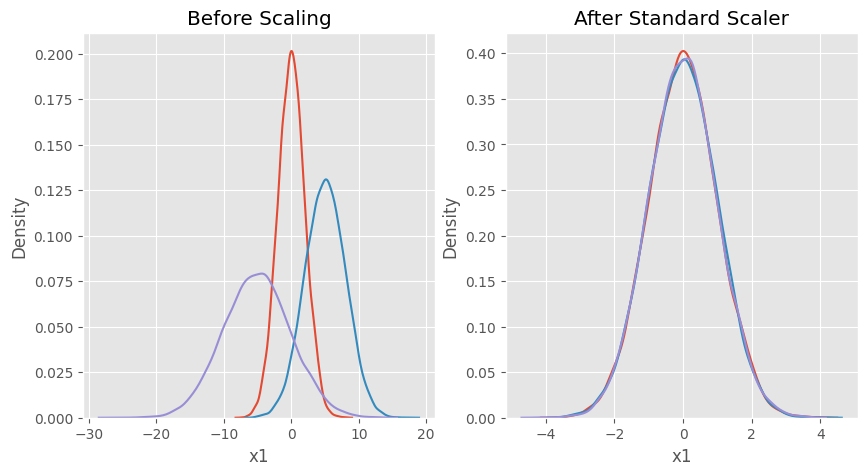

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

axs[0].set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=axs[0])
sns.kdeplot(df['x2'], ax=axs[0])
sns.kdeplot(df['x3'], ax=axs[0])
axs[1].set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=axs[1])
sns.kdeplot(scaled_df['x2'], ax=axs[1])
sns.kdeplot(scaled_df['x3'], ax=axs[1])
plt.show()

# Min-Max Scaling

$$ \frac{x_{i} - min(x)}{max(x)-min(x)} $$

Also known as normalization. Retains the original distribution but scales the data to be between 0 and 1.

*When to use:* When the standard deviation is small, the data are not normally distributed, and there are no outliers.

scaled_df is of type <class 'numpy.ndarray'>


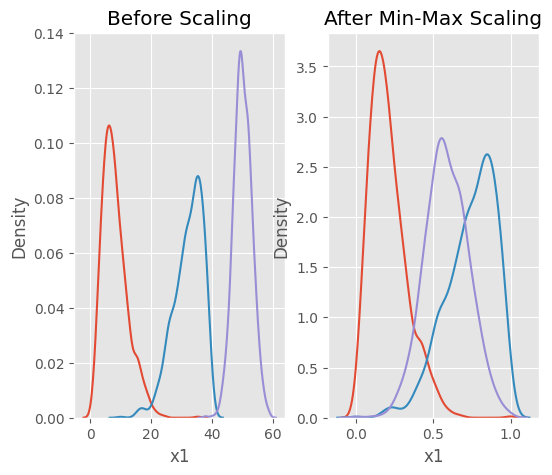

In [ ]:
np.random.seed(1)

df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
print(f"scaled_df is of type {type(scaled_df)}")
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])
# scaled_df = pd.DataFrame(scaled_df, columns = df.columns )

fig, axs = plt.subplots(ncols=2, figsize=(6, 5))
axs[0].set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=axs[0])
sns.kdeplot(df['x2'], ax=axs[0])
sns.kdeplot(df['x3'], ax=axs[0])
axs[1].set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=axs[1])
sns.kdeplot(scaled_df['x2'], ax=axs[1])
sns.kdeplot(scaled_df['x3'], ax=axs[1])
plt.show() ;

# Robust Scaling

$$ \frac{x_{i} - median(x)}{Q_{3}(x) - Q_{1}(x)} $$

Similar to Min-Max but resistant to outliers.  Unlike Min-Max, it is not bounded by 0 and 1, but rather has its median centered on 0.
It scales using the quartiles by subtracting the $median (x)$ from each value of $x$ and dividing by the IQR ($Q_{3}(x) - Q_{1}(x)$).

*When to use:* When there are significant outliers.

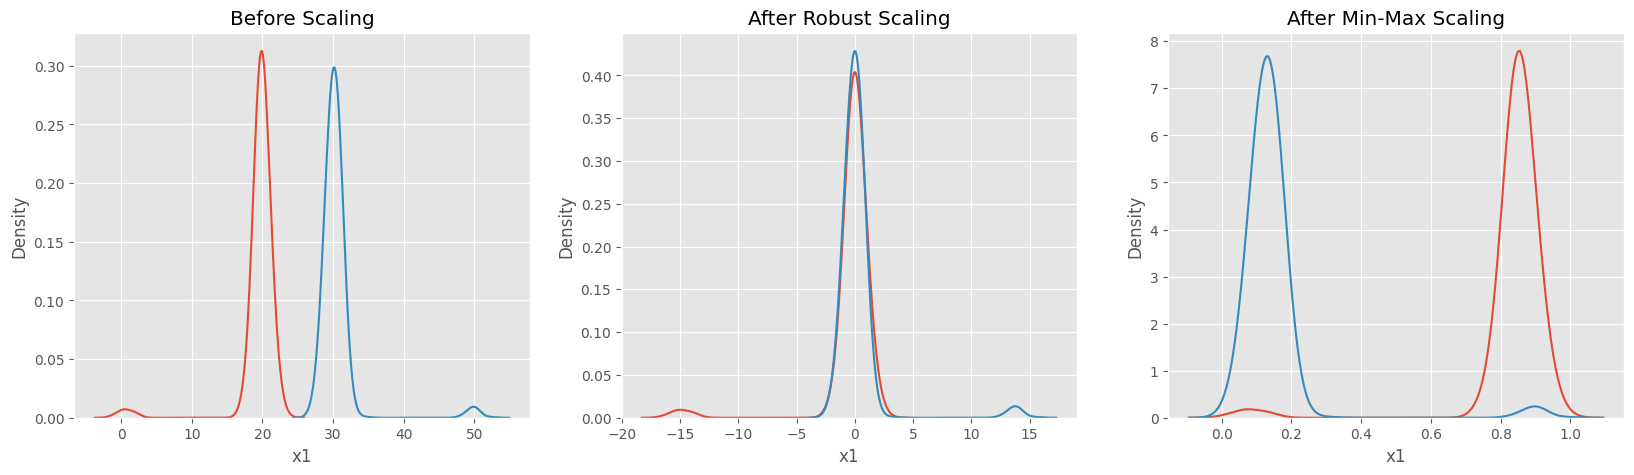

In [ ]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
plt.show()

Note: Many of the sklearn implementations of machine learning models have a parameter you can set to normalize the data.